# Q1: the stock market

In [67]:
import numpy as np
import random
import time

In [1]:
def next_day_Bull():
    n = random.randint(1, 1000)
    if n <= 900:
        return "Bull market"
    elif n <= 975:
        return "Bear market"
    else:
        return "Stagnant market"

def next_day_Bear():
    n = random.randint(1, 1000)
    if n <= 800:
        return "Bear market"
    elif n <= 950:
        return "Bull market"
    else:
        return "Stagnant market"

def next_day_Stagnant():
    n = random.randint(1, 1000)
    if n <= 500:
        return "Stagnant market"
    elif n <= 750:
        return "Bull market"
    else:
        return "Bear market"

def first_day():
    n = random.randint(1, 1000)
    if n <= 333:
        return "Stagnant market"
    elif n <= 666:
        return "Bull market"
    else:
        return "Bear market"

# Function to calculate days
def calcolo_giorni(day, type_of_days):
    if day == "Bull market":
        type_of_days[0] += 1
        day = next_day_Bull()
    elif day == "Bear market":
        type_of_days[1] += 1
        day = next_day_Bear()
    elif day == "Stagnant market":
        type_of_days[2] += 1
        day = next_day_Stagnant()
    return day, type_of_days

In [2]:
%%time

N_giorni = 100000

days_in_Bull = 0
days_in_Bear = 0
days_in_Stagnant = 0
type_of_days = [days_in_Bull, days_in_Bear, days_in_Stagnant]

day = first_day()

for _ in range(N_giorni):
    day, type_of_days = calcolo_giorni(day, type_of_days)

# Results
print("giorni in Bull: {:.2f} %".format(type_of_days[0] / N_giorni * 100))
print("giorni in Bear: {:.2f} %".format(type_of_days[1] / N_giorni * 100))
print("giorni in Stagnant: {:.2f} %".format(type_of_days[2] / N_giorni * 100))
print("Totale: {:.2f} %".format(sum(type_of_days) / N_giorni * 100))


giorni in Bull: 62.20 %
giorni in Bear: 31.64 %
giorni in Stagnant: 6.16 %
Totale: 100.00 %
CPU times: total: 78.1 ms
Wall time: 153 ms


Numba version

In [5]:
from numba import njit
import numpy as np

@njit
def next_day(day):
    n = np.random.randint(1, 1001)
    if day == 0:  # Bull market
        if n <= 900:
            return 0
        elif n <= 975:
            return 1
        else:
            return 2
    elif day == 1:  # Bear market
        if n <= 800:
            return 1
        elif n <= 950:
            return 0
        else:
            return 2
    else:  # Stagnant market
        if n <= 500:
            return 2
        elif n <= 750:
            return 0
        else:
            return 1

@njit
def simulate_markov_chain(n_days):
    # Initialize counts and current state
    days_count = np.zeros(3, dtype=np.int32)
    current_day = np.random.randint(0, 3)  # Random initial state (0: Bull, 1: Bear, 2: Stagnant)
    for _ in range(n_days):
        days_count[current_day] += 1
        current_day = next_day(current_day)
    return days_count

In [11]:
%%time

N_giorni = 10_000_000
days_count = simulate_markov_chain(N_giorni)

# Results
print("giorni in Bull: {:.2f} %".format(days_count[0] / N_giorni * 100))
print("giorni in Bear: {:.2f} %".format(days_count[1] / N_giorni * 100))
print("giorni in Stagnant: {:.2f} %".format(days_count[2] / N_giorni * 100))
print("Totale: {:.2f} %".format(sum(days_count) / N_giorni * 100))

giorni in Bull: 62.49 %
giorni in Bear: 31.27 %
giorni in Stagnant: 6.24 %
Totale: 100.00 %
CPU times: total: 62.5 ms
Wall time: 63.2 ms


# S2: consisten plotting

In [17]:
import matplotlib.pyplot as plt
from functools import wraps

def myplot(func):
    def wrapper(*args, **kwargs):
        
        plt.style.use('default') 
        fig, ax = plt.subplots(figsize=(8, 6))  
        
        plt.rc('font', size=12)          
        plt.rc('axes', titlesize=14)    
        plt.rc('axes', labelsize=13)
        plt.rc('xtick', labelsize=12)
        plt.rc('ytick', labelsize=12)
        
        result = func(*args, ax=ax, **kwargs)  
        
        filename = func.__name__ + ".pdf"  
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        print(f"Plot saved to {filename}")
        
        plt.show()
        
        return result
    return wrapper


<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\User\AppData\Local\Temp\ipykernel_12088\1877299366.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel("$\phi$ [rad]")


Plot saved to plot_sin.pdf


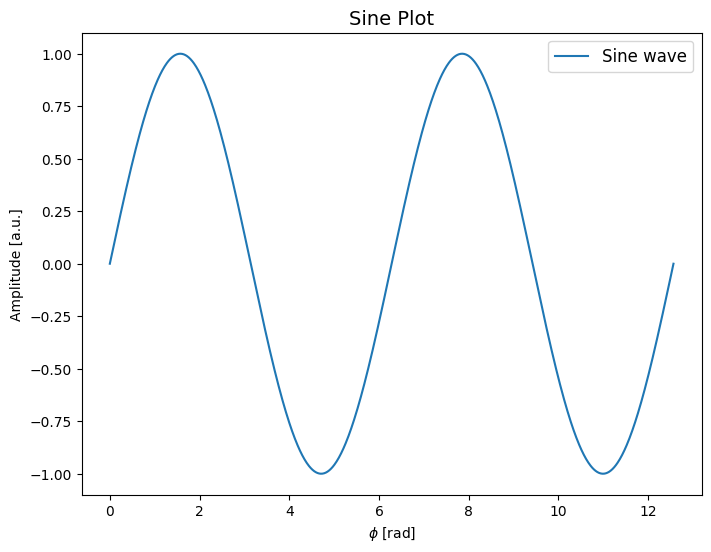

In [20]:
import numpy as np
import math

@myplot
def plot_sin(ax, x, y):
    ax.plot(x, y, label="Sine wave")
    ax.set_title("Sine Plot")
    ax.set_xlabel("$\phi$ [rad]")
    ax.set_ylabel("Amplitude [a.u.]")
    ax.legend()

x = np.linspace(0, 4 * math.pi, 1000)
y = np.sin(x)

plot_sin(x=x, y=y)